<a href="https://colab.research.google.com/github/Paresh-0007/MyJourneyWhileLearningAIML/blob/main/TASK_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [1]:
# Your code goes here
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('/content/glass.csv')

In [8]:
data.shape

(214, 10)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(213, 10)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [15]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
X = data.drop('Type',axis =1)

In [18]:
y = data.iloc[:,-1]

In [19]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [20]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [21]:
X = scaler.fit_transform(X)

In [28]:
scaler.feature_names_in_

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype=object)

In [29]:
X = pd.DataFrame(X,columns=scaler.feature_names_in_)

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = knn.predict(X_test)

In [44]:
accuracy_score(y_pred,y_test)

0.6511627906976745

In [45]:
n_value = range(1,16)

<function matplotlib.pyplot.show(close=None, block=None)>

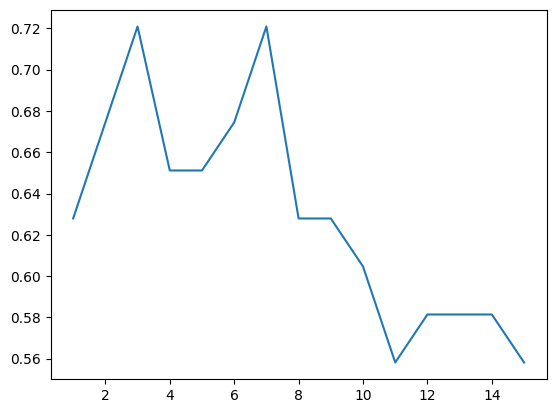

In [46]:
accur = list()

for i in n_value:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accur.append(accuracy_score(knn.predict(X_test),y_test))

import matplotlib.pyplot as plt

plt.plot(n_value,accur)
plt.show